# Exercise H3.2:  MLP Regression

## Initialization

Constructing MLP with single hidden layer ($N_1 = 3$) and single input and output neuron ($N_L = N_2 = 1$)

In [1]:
N0 = 1
N1 = 3
N2 = 1

In [2]:
import numpy as np

Using $tanh$ as transfer function (`np.tanh`)

Initialize weights in interval of $[-0.5,0.5]$

In [3]:
def initialize_weights():
    W10 = np.random.uniform(-0.5, 0.5, (N0 + 1, N1)) # (2, 3)
    W21 = np.random.uniform(-0.5, 0.5, (N1 + 1, N2)) # (4, 1)
    return W10, W21

In [4]:
W10, W21 = initialize_weights()

with $\underline{W}^{v'v} \in \mathbb{R}^{(N_v+1) \times N_{v'}}$ (inclusing bias vector)

Therefore,

$\underline{h}^{v'} = {\underline{W}^{v'v}}^\top \cdot \underline{f}^v(\underline{h}^v) = {\underline{W}^{v'v}}^\top \cdot \underline{s}^v$

In [5]:
W10

array([[ 0.02596434, -0.25902193, -0.36975844],
       [ 0.26234194,  0.05727734,  0.4958408 ]])

In [6]:
W21

array([[-0.4362734 ],
       [-0.38579149],
       [-0.11204119],
       [ 0.21977373]])

## Interative learning

In [7]:
def forward_prop(x, W10, W21):
    h0 = np.array(x)
    # inputs not using transfer function
    s0 = np.array([1, *h0])
    
    h1 = W10.T @ s0
    s1 = np.array([1, *np.tanh(h1)])
    
    h2 = W21.T @ s1
    y = h2
    return h0, h1, h2

In [8]:
forward_prop([0.3], W10, W21)

(array([0.3]),
 array([ 0.10466692, -0.24183873, -0.2210062 ]),
 array([-0.49772218]))

In [9]:
def quadratic_error(y, y_t):
    return 0.5 * (y_t - y)**2

In [10]:
def quadratic_error_deriv(y, y_t):
    return y - y_t

In [11]:
def tanh_deriv(x):
    return 1.0 - np.tanh(x)**2

In [12]:
def backward_prop(h2, h1, W21):
    # derivative of linear transfer function for output neuron is 1
    delta2 = [1]
    
    delta1_bias = 1 * (W21[0] * delta2)
    delta1_nonbias = tanh_deriv(h1) * (W21[1:].T * delta2)
    delta1 = np.array([*delta1_bias, * delta1_nonbias.flatten()])

    return delta2, delta1

In [13]:
h0, h1, h2 = forward_prop([0.3], W10, W21)
backward_prop(h2, h1, W21)

([1], array([-0.4362734 , -0.38159576, -0.10573563,  0.20937927]))

In [17]:
def calculate_gradient(y, y_t, v, v_prime, i, j, delta_v_prime, h_v):
    if j == 0:
        gradient = quadratic_error_deriv(y, y_t) * delta_v_prime[i] * 1
    else:
        gradient = quadratic_error_deriv(y, y_t) * delta_v_prime[i] * np.tanh(h_v[j])
        
    return gradient

In [18]:
def calculate_delta_W(W, y, y_t, v, v_prime, delta_v_prime, h_v):
    N, N_prime = W.shape
    
    delta_W = np.zeros(W.shape)
    for j in range(N):
        for i in range(N_prime):
            delta_W[j, i] = calculate_gradient(y=y, y_t=y_t, v=v, v_prime=v_prime, 
                                               i=i, j=j,
                                               delta_v_prime=delta_v_prime, h_v=h_v)
    return delta_W

In [19]:
h0, h1, h2 = forward_prop([0.3], W10, W21)
delta2, delta1 = backward_prop(h2, h1, W21)
calculate_gradient(y=h2, y_t=0.4, v=1, v_prime=2,
                   i=0, j=1,
                   delta_v_prime=delta2, h_v=h1)

array([0.2129682])

In [20]:
X = np.loadtxt("RegressionData.txt")

In [21]:
def epoch(W10, W21):
    delta_W10 = np.zeros(W10.shape)
    delta_W21 = np.zeros(W21.shape)
    for x in X:
        x1, y_t = x
        h0, h1, h2 = forward_prop([x1], W10, W21)
        delta2, delta1 = backward_prop(h2, h1, W21)
        y = h2
        delta_W10 += calculate_delta_W(W=W10, y=y, y_t=y_t,
                                        v=0, v_prime=1,
                                        delta_v_prime=delta1, h_v=np.array([1, *h0]))
        delta_W21 += calculate_delta_W(W=W21, y=y, y_t=y_t,
                                        v=1, v_prime=2,
                                        delta_v_prime=delta2, h_v=np.array([1, *h1]))
    
    delta_W10 = delta_W10 / len(X)
    delta_W21 = delta_W21 / len(X)
    
    return delta_W10, delta_W21

In [22]:
def update_weights(W, delta_W, learning_rate=0.5):
    return W - learning_rate * delta_W

In [23]:
def calculate_E_T(X, W10, W21):
    errors = []
    for x in X:
        x1, y_t = x
        h0, h1, h2 = forward_prop([x1], W10, W21)
        y = h2
        error = quadratic_error(y, y_t)
        errors.append(error)
    return np.array(errors).sum() / len(X)

In [24]:
W10, W21 = initialize_weights()

error_history = []
for t in range(1000):
    delta_W10, delta_W21 = epoch(W10, W21)
    W10 = update_weights(W10, delta_W10)
    W21 = update_weights(W21, delta_W21)
    error_history.append(calculate_E_T(X, W10, W21))

In [25]:
W10

array([[ 0.22077303,  0.49115511,  0.65608285],
       [-0.73988442, -0.91965682, -0.63139719]])

/home/jonas/miniconda3/envs/mi1/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


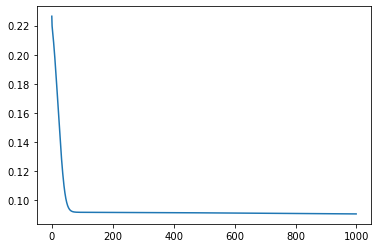

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(range(len(error_history)), error_history)
fig.show()

In [27]:
X_test = np.linspace(0, 1, 1000)
s1_history = []
y_history = []

for x in X_test.T:
    h0, h1, h2 = forward_prop([x], W10, W21)
    s1 = np.tanh(h1)
    s1_history.append(s1)
    
    y_history.append(h2)
    
s1_history = np.array(s1_history)
y_history = np.array(y_history)

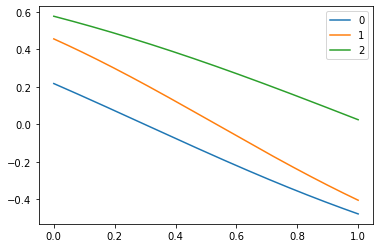

In [28]:
fig, ax = plt.subplots()

for i in range(N1):
    ax.plot(X_test, s1_history[:,i], label=i)
ax.legend()

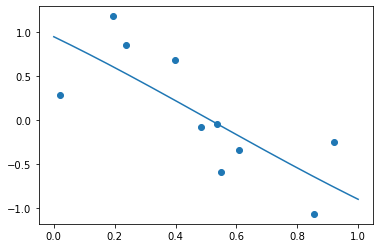

In [29]:
fig, ax = plt.subplots()

ax.plot(X_test, y_history)
ax.scatter(x=X[:,0], y=X[:,1])